In [2]:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

/n/home00/lee.5922/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [103]:
lamb_gal

NameError: name 'lamb_gal' is not defined

g g 4600
r r 6100
i m 7500
z k 8800


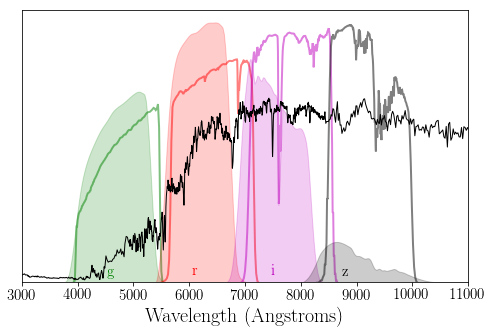

In [167]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_filter, fetch_vega_spectrum

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.

#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Set up figure and axes
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

#----------------------------------------------------------------------
# Fetch and plot 
plate = 288
mjd = 52000
fiber = 37
#galspec = fetch_sdss_spectrum(plate, mjd, fiber)
#ax.plot(galspec.wavelength(), galspec.spectrum , '-k', linewidth=0.5
#        , label='spectrum')

galdata = np.genfromtxt('sed_NGC4552.txt')
lamb_gal = galdata[:,0] + 1600
galspectrum = galdata[:,1] *1./galdata[:,1].max() * 0.7
ax.plot(lamb_gal, galspectrum , '-k', linewidth=1
        , label='spectrum')

desdata = np.genfromtxt('desfilter.txt')
lamb_des = desdata[:,0]




#------------------------------------------------------------
# Fetch and plot the five filters
text_kwargs = dict(ha='center', va='center', alpha=1.0, fontsize=15)

ii = 1
for f, c, loc in zip('griz', 'grmk', [4600, 6100, 7500, 8800]):
    print f, c, loc
    data = fetch_sdss_filter(f)
    ax.fill(desdata[:,0], desdata[:,ii], ec=c, fc='none', lw = 2.0, alpha=0.5)
    #ax.plot(data[0], data[1]*2, c=c, lw = 0.5)
    ax.fill(data[0], data[1]*2, ec=c, fc=c, alpha=0.2)
    ax.text(loc, 0.05, f, color=c, **text_kwargs)
    ii += 1
ax.set_xlim(3000, 11000)
ax.set_ylim(0.01,)
ax.set_yticks([])
ax.tick_params(labelsize=15)
#ax.set_title('SDSS Filters and Reference Spectrum')
ax.set_xlabel('Wavelength (Angstroms)', fontsize = 20)
#ax.set_ylabel('normalized flux / filter transmission', fontsize = 20)

fig.savefig('../paper_figure/filter.pdf')

In [135]:
ax.get_xticklabels

<bound method AxesSubplot.get_xticklabels of <matplotlib.axes._subplots.AxesSubplot object at 0x7fcee9fe7c90>>

In [24]:
data = fetch_sdss_filter('r')

In [25]:
data.shape

(5, 75)

In [15]:
help(sdss_corrected_spectra.fetch_sdss_corrected_spectra)

Help on function fetch_sdss_corrected_spectra in module astroML.datasets.sdss_corrected_spectra:

fetch_sdss_corrected_spectra(data_home=None, download_if_missing=True)
    Loader for Iterative PCA pre-processed galaxy spectra
    
    Parameters
    ----------
    data_home : optional, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit learn data is stored in '~/astroML_data' subfolders.
    
    download_if_missing : optional, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    Returns
    -------
    data : NpzFile
        The data dictionary
    
    Notes
    -----
    This is the file created by the example script
    examples/datasets/compute_sdss_pca.py



In [73]:
plate = 1615
mjd = 53166
fiber = 513
from astroML.datasets import fetch_sdss_spectrum
spec = fetch_sdss_spectrum(plate, mjd, fiber)

[========================================]  182.8kb / 182.8kb   
caching to /n/home00/lee.5922/astroML_data/SDSSspec/1615/spSpec-53166-1615-513.fit


In [75]:
sdss_corrected_spectra.fetch_sdss_corrected_spectra()

downloading PCA-processed SDSS spectra from http://www.astro.washington.edu/users/vanderplas/spec4000.npz to /n/home00/lee.5922/astroML_data


AttributeError: 'NoneType' object has no attribute 'strip'

[========================================]  182.8kb / 182.8kb   
caching to /n/home00/lee.5922/astroML_data/SDSSspec/2241/spSpec-54169-2241-542.fit


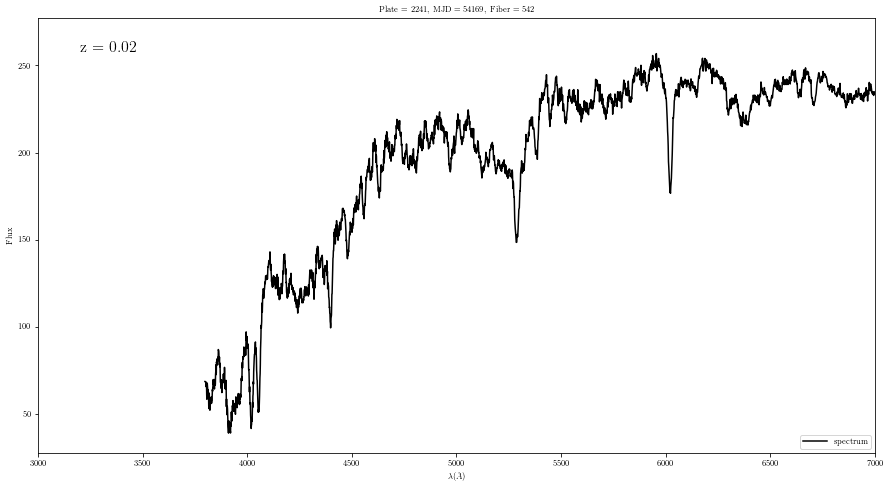

In [91]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

#------------------------------------------------------------
# Fetch single spectrum
plate = 2241
mjd = 54169
fiber = 542
spec = fetch_sdss_spectrum(plate, mjd, fiber)

#------------------------------------------------------------
# Plot the resulting spectrum
#ax = plt.axes()
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
#ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

ax.legend(loc=4)

ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

#ax.set_ylim(-10, 300)
ax.set_xlim(3000, 7000)
plt.show()

In [16]:
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()

downloading PCA-processed SDSS spectra from http://www.astro.washington.edu/users/vanderplas/spec4000.npz to /n/home00/lee.5922/astroML_data


AttributeError: 'NoneType' object has no attribute 'strip'

In [12]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import RandomizedPCA
from astroML.datasets import sdss_corrected_spectra

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------
# Use pre-computed PCA to reconstruct spectra
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
lam = sdss_corrected_spectra.compute_wavelengths(data)

#------------------------------------------------------------
# select random spectra
np.random.seed(5)
nrows = 5
ncols = 3
ind = np.random.randint(spectra.shape[0], size=nrows * ncols)
spec_sample = spectra[ind]

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 4))

fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

for i in range(ncols):
    for j in range(nrows):
        ax = fig.add_subplot(nrows, ncols, ncols * j + 1 + i)
        ax.plot(lam, spec_sample[ncols * j + i], '-k', lw=1)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < nrows - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            plt.xlabel(r'wavelength $(\AA)$')

        ax.set_xlim(3000, 7999)
        ylim = ax.get_ylim()
        dy = 0.05 * (ylim[1] - ylim[0])
        ax.set_ylim(ylim[0] - dy, ylim[1] + dy)

plt.show()

downloading PCA-processed SDSS spectra from http://www.astro.washington.edu/users/vanderplas/spec4000.npz to /n/home00/lee.5922/astroML_data


AttributeError: 'NoneType' object has no attribute 'strip'